In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from typing import Dict

In [41]:
try:
    df_tsla = pd.read_csv('../data/TSLA.csv', parse_dates=['Date'], index_col='Date')
    df_bnd = pd.read_csv('../data/BND.csv', parse_dates=['Date'], index_col='Date')
    df_spy = pd.read_csv('../data/SPY.csv', parse_dates=['Date'], index_col='Date')

except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure the data files are in the correct directory.")

In [42]:
df_tsla.columns

Index([' Open', 'High', 'Low', 'Close', 'Volume', 'Daily Return',
       'Rolling Mean', 'Rolling Std'],
      dtype='object')

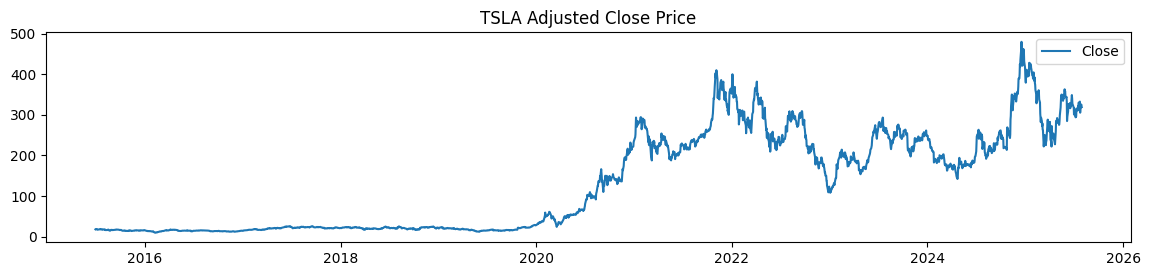

In [43]:
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(df_tsla['Close'], label='Close')
plt.title(f'TSLA Adjusted Close Price')
plt.legend()

In [50]:
def plot(df, ticker, price_col = 'Close'):
    fig, axs = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

    axs[0].plot(df.index, df[price_col], label=price_col)
    axs[0].set_title(f'{ticker} {price_col} Price')
    axs[0].legend()


    axs[1].plot(df.index, df['Daily Return'], label='Daily Return', color='orange')
    axs[1].set_title(f'{ticker} Daily Returns')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

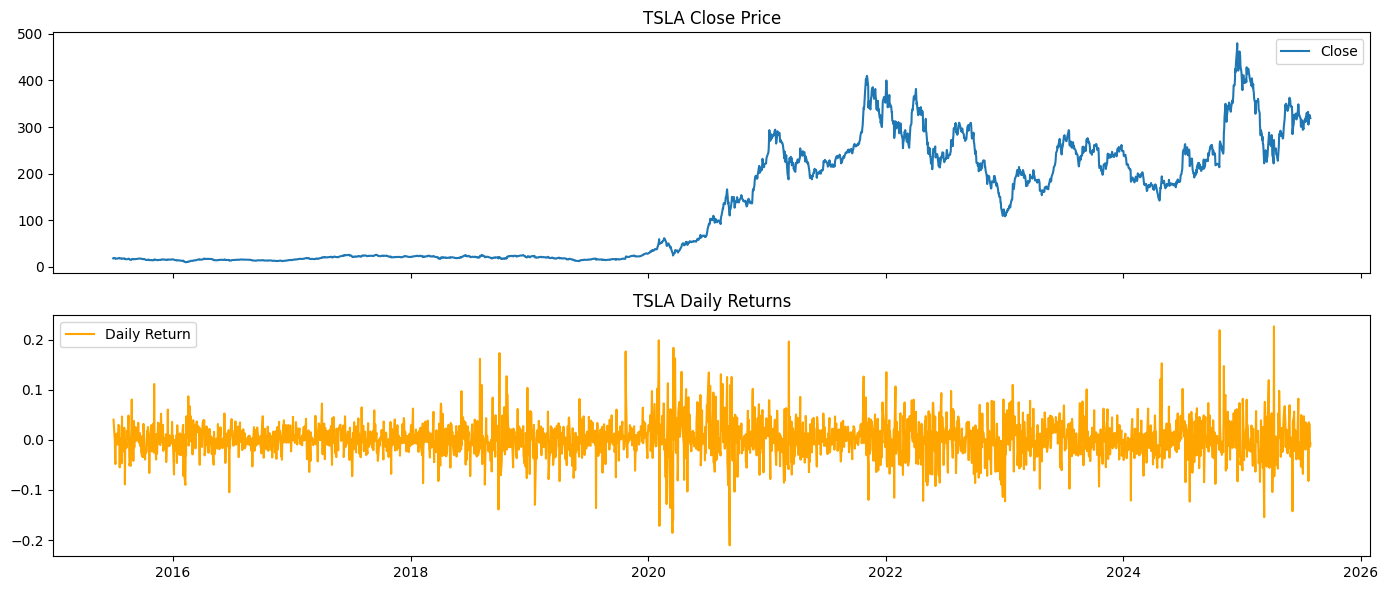

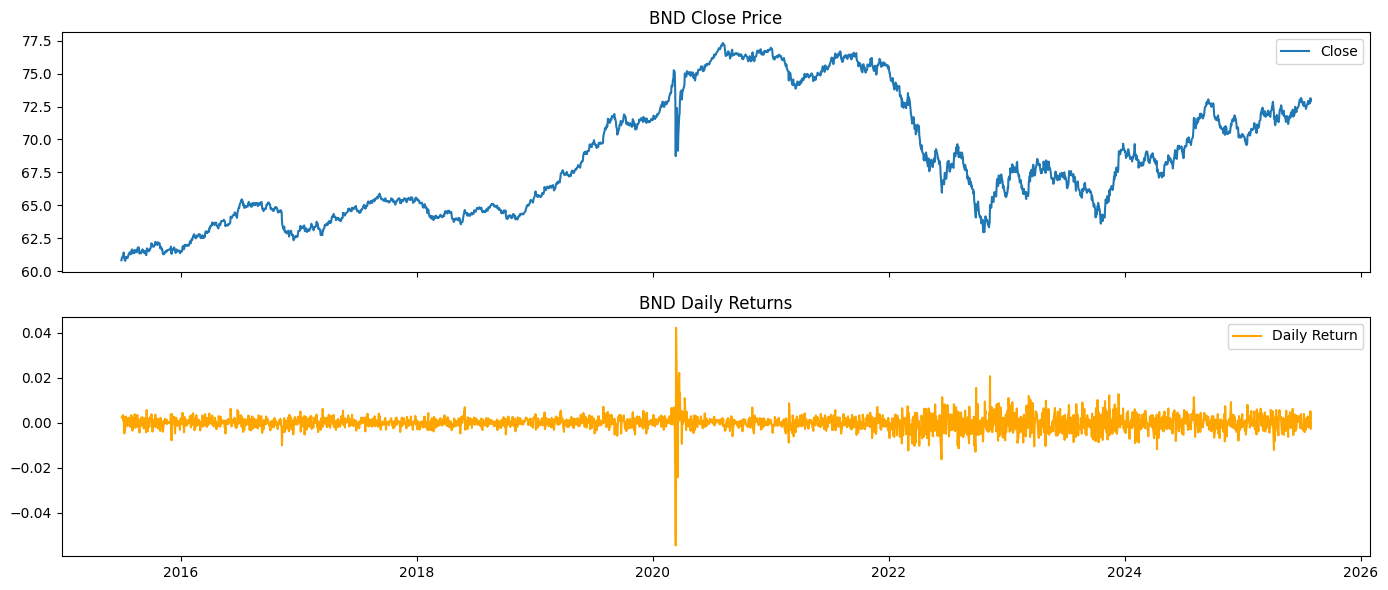

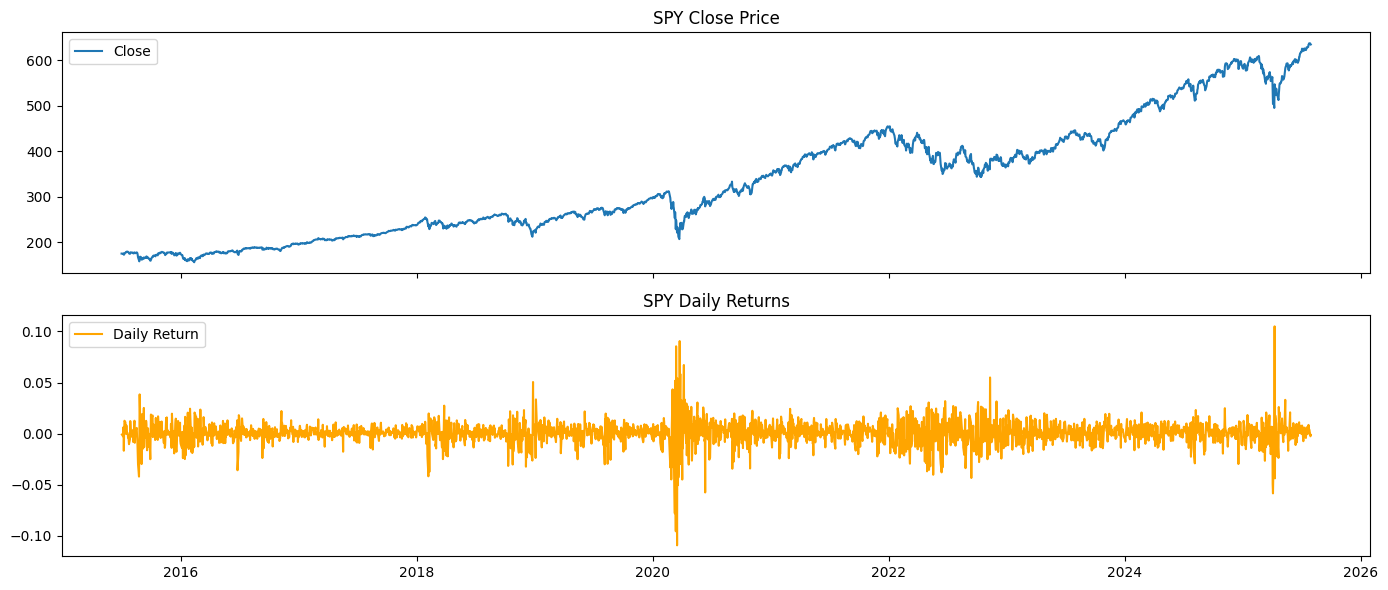

In [51]:
plot(df_tsla, 'TSLA')
plot(df_bnd, 'BND')
plot(df_spy, 'SPY')

In [55]:
def test_stationarity(series: pd.Series) -> Dict[str, float]:
    """
    Perform Augmented Dickey-Fuller test to check stationarity.
    
    Args:
        series (pd.Series): Time series data.
    
    Returns:
        dict: ADF statistic, p-value, and critical values.
    """
    try:
        result = adfuller(series.dropna())
        return {
            'ADF Statistic': result[0],
            'p-value': result[1],
            'Critical Values': result[4]
        }
    except Exception as e:
        print(f"Error performing ADF test: {e}")
        return {}

In [56]:
adf_results = test_stationarity(df_tsla['Close'])
print(f"ADF Test Results for {'TSLA'}:")
for key, value in adf_results.items():
    print(f"{key}: {value}")

ADF Test Results for TSLA:
ADF Statistic: -1.4188720053968276
p-value: 0.5731959514207221
Critical Values: {'1%': np.float64(-3.4329610922579095), '5%': np.float64(-2.8626935681060375), '10%': np.float64(-2.567384088736619)}


In [57]:
adf_results = test_stationarity(df_bnd['Close'])
print(f"ADF Test Results for {'BND'}:")
for key, value in adf_results.items():
    print(f"{key}: {value}")

ADF Test Results for BND:
ADF Statistic: -1.5362483767189918
p-value: 0.5155097045499712
Critical Values: {'1%': np.float64(-3.432946577138947), '5%': np.float64(-2.8626871581881708), '10%': np.float64(-2.5673806760176046)}


In [59]:
adf_results = test_stationarity(df_spy['Close'])
print(f"ADF Test Results for {'SPY'}:")
for key, value in adf_results.items():
    print(f"{key}: {value}")

ADF Test Results for SPY:
ADF Statistic: 0.6908133257450266
p-value: 0.9896527393818622
Critical Values: {'1%': np.float64(-3.4329424595562963), '5%': np.float64(-2.862685339846278), '10%': np.float64(-2.5673797079109892)}
